In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def binary_random(p):
    if random.random() < p:
        return 1
    else:
        return 0

def initial_probability_vector(length):
    return [0] + list(0.5 for i in range(length))

def random_individual(p):
    return [0] + [binary_random(x) for x in p]

def random_population(p, N):
    return [random_individual(p) for _ in range(N)]

def population_evaluation(P, F):
    for c in P:
        c[0] = F(c[1:])

def best_individual(P):
    index = np.argmax(list(map((lambda x: x[0]), P)))
    return P[index]

def population_based_incremental_learning(F, N, length, iterations, learning_ratio, mutation_prob, disturbance_factor):
    p = initial_probability_vector(length)
    P = random_population(p, N)
    populations = []
    population_evaluation(P, F)

    for _ in range(iterations):
        best = best_individual(P)

        for k in range(1, length+1):
            p[k] = p[k] * (1-learning_ratio) + best[k] * learning_ratio

        for k in range(1, length+1):
            if (random.random() < mutation_prob):
                p[k] = p[k] * (1 - disturbance_factor) + binary_random(0.5) * disturbance_factor

        populations.append(P)

        P = random_population(p, N)
        population_evaluation(P, F)



    return populations


In [9]:
def best_score(P):
    return np.max(list(map((lambda x: x[0]), P)))

def worst_score(P):
    return np.min(list(map((lambda x: x[0]), P)))

def mean_score(P):
    return np.mean(list(map((lambda x: x[0]), P)))

In [3]:
def one_max(p):
    return sum(p)

def deceptive_one_max(p):
    if sum(p) == 0: return len(p)+1
    else: return sum(p)

def k_deceptive_one_max(breaks, p):
    breaks = [0] + breaks + [len(p)]

    res = 0

    for i in range(1,len(breaks)):
        res += deceptive_one_max(p[breaks[i-1]: breaks[i]])

    return res

In [28]:
def plot_populations(populations):
    bests = list(map(best_score, populations))
    worsts = list(map(worst_score, populations))
    means = list(map(mean_score, populations))


    plt.figure(figsize=[12, 7])

    plt.axis(True)
    plt.grid(True)

    plt.plot(bests)
    plt.plot(means)
    plt.plot(worsts)

    plt.show()

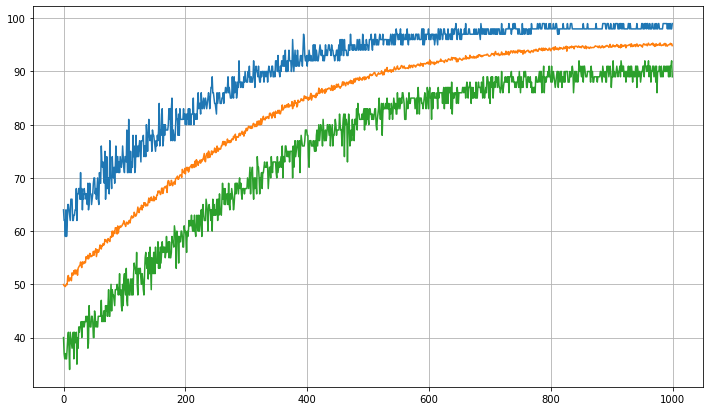

In [29]:
oneMax_1 = population_based_incremental_learning(F=one_max, N=100, length=100, iterations=1000, learning_ratio=0.01, mutation_prob=0.05, disturbance_factor=0.01)

plot_populations(oneMax_1)


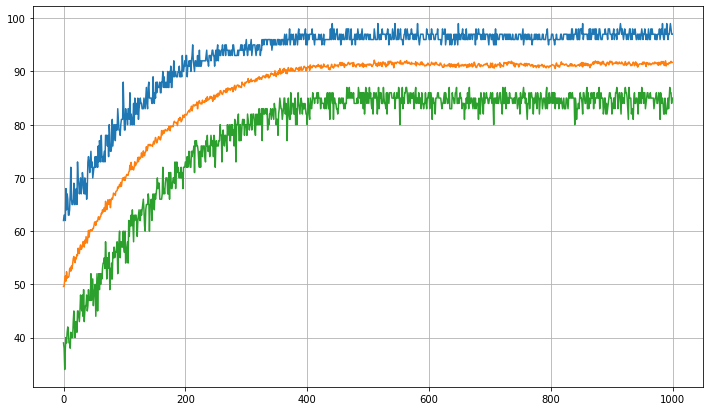

In [30]:
oneMax_2 = population_based_incremental_learning(F=one_max, N=100, length=100, iterations=1000, learning_ratio=0.02, mutation_prob=0.1, disturbance_factor=0.02)

plot_populations(oneMax_2)

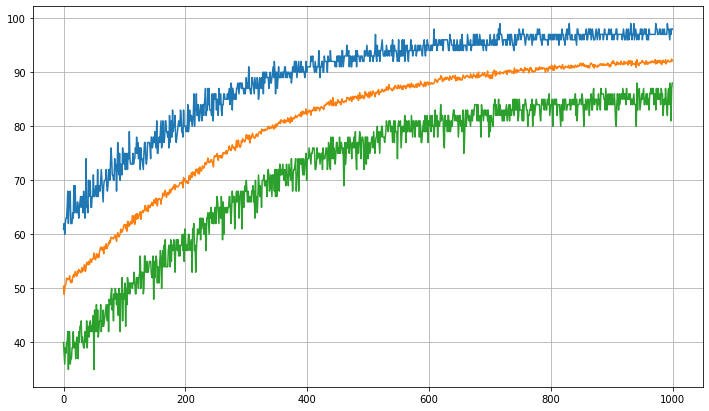

In [37]:
oneMax_3 = population_based_incremental_learning(F=one_max, N=100, length=100, iterations=1000, learning_ratio=0.01, mutation_prob=0.1, disturbance_factor=0.01)

plot_populations(oneMax_3)



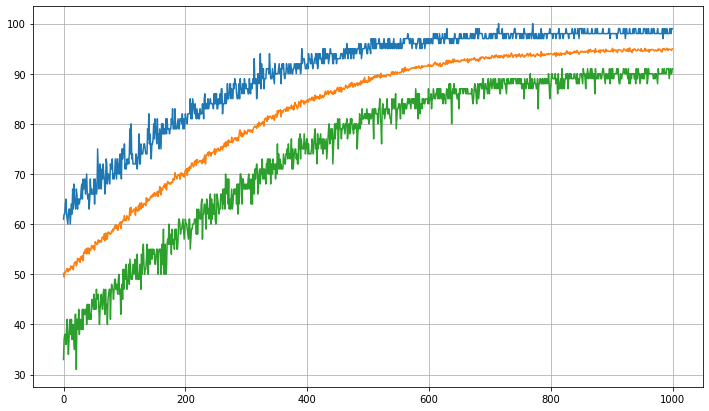

In [40]:
deceptiveOneMax_1 = population_based_incremental_learning(F=deceptive_one_max, N=100, length=100, iterations=1000, learning_ratio=0.01, mutation_prob=0.05, disturbance_factor=0.01)

plot_populations(deceptiveOneMax_1)

In [ ]:
deceptiveOneMax_1_bests = list(map(best_score, deceptiveOneMax_1))

print(max(deceptiveOneMax_1_bests))